<a href="https://colab.research.google.com/github/deborahmasibo/Moringa-Core-Module-2-Week-2-IP/blob/main/Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2. Data Understanding

In [1]:
# Imports
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression, RidgeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import RepeatedKFold
from scipy.stats import bartlett, chi2, loguniform
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import os
# Using seaborn style defaults and setting the default figure size
sns.set(rc={'figure.figsize':(30, 5)})
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

In [2]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Accessing working directory
os.chdir('/content/drive/My Drive/Core/Machine Learning/Moring Core Module 2 Week 2 IP')

Mounted at /content/drive


### a) Reading the Data

In [3]:
# Dataset loading
house_price = pd.read_csv('Independent Project Week 7 - house_data.csv')

### b) Checking the Data

**Number of Records**

In [4]:
# Number of rows and columns
print(f'Records: {house_price.shape[0]} and columns: {house_price.shape[1]}')

Records: 21613 and columns: 20


**Top Dataset Preview**

In [5]:
# First 5 records
house_price.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Bottom Dataset Preview**

In [6]:
# Last 5 records
house_price.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


### c) Checking Datatypes

In [7]:
# Dataset infromation
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

The datatypes do not need to be changed. Futhermore, the dataset does not have missing values.

## 3. External Dataset Validation 

## 4. Data Preperation

### a) Validation

In [8]:
# Dataset columns
house_price.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
# Dropping the ID column as it does not contribute significant information to the project.
house_price.drop('id', axis = 1, inplace = True)

### b) Completeness

In [10]:
# Confirming that there are no missing values.
house_price.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values.

### c) Consistency

In [11]:
# Checking for duplicates
house_price.duplicated().any().any()

True

In [12]:
# Dropping duplicates
house_price.drop_duplicates(inplace = True)
# Checking changes
house_price.duplicated().any().any()

False

Duplicates have been removed.

### d) Uniformity

In [13]:
# Checking column name uniformity
house_price.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

The column names are uniform.

### e) Outliers

In [14]:
# Outliers function
def outliers(data):
  # IQR
  Q1, Q3, IQR = 0, 0, 0
  outliers = pd.DataFrame()
  # Numerical columns
  numerical = data.select_dtypes(include = ['int64', 'float64'])
  Q1 = numerical.quantile(0.25)
  Q3 = numerical.quantile(0.75)
  IQR = Q3 - Q1
  # Outliers
  outliers = numerical[((numerical < (Q1 - 1.5 * IQR)) |(numerical > (Q3 + 1.5 * IQR))).any(axis=1)]
  print(f'Number of outliers = {outliers.shape[0]}')
  print(f'Percentage = {(outliers.shape[0]/data.shape[0])*100}%')

In [15]:
# Checking for outliers
outliers(house_price)

Number of outliers = 6680
Percentage = 30.91447611995557%


Outliers will be retained for further analysis as they form a significant part of the data.

To compare model performance with and without outliers, a dataset without outliers will be created.

In [16]:
# Dataset without outliers
# Removing outliers 
Q1 = house_price.quantile(0.25)
Q3 = house_price.quantile(0.75)
IQR = Q3 - Q1
house_price_no =  house_price[~ ((house_price< (Q1 - 1.5 * IQR)) |(house_price > (Q3 + 1.5 * IQR))).any(axis=1)]
house_price_no.shape

(14928, 19)

## 5. Exploratory Data Analyisis

### a) Univariate Analysis

**Categorical**

In [17]:
# Columns
cols = house_price.columns.tolist()
# Number of unique values
print(f'Number of unique values\n')
for col in cols:
  print(f'{col}: {len(house_price[col].unique().tolist())}')


Number of unique values

price: 3625
bedrooms: 13
bathrooms: 30
sqft_living: 1038
sqft_lot: 9782
floors: 6
waterfront: 2
view: 5
condition: 5
grade: 12
sqft_above: 946
sqft_basement: 306
yr_built: 116
yr_renovated: 70
zipcode: 70
lat: 5034
long: 752
sqft_living15: 777
sqft_lot15: 8689


Categorical columns = waterfront, condition and the grade.

In [18]:
# Categorical Plots
def CatPlots(column, data):
  fig,ax  = plt.subplots(figsize = (10,5))
  sns.countplot(data[column], palette = 'viridis', orient = 'v')
  plt.title('Bar Plot -  '+ column, fontsize=20, y = 1.05)
  plt.xlabel(column, fontsize=15)
  plt.ylabel('Count', fontsize=15)
  plt.show()

*Waterfront*

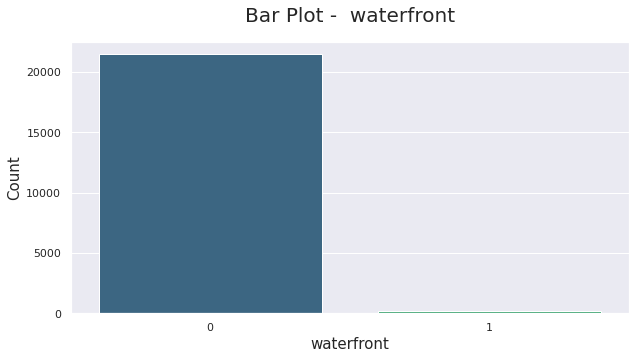

In [19]:
# Waterfront count plot
CatPlots('waterfront', house_price)

*Condition*

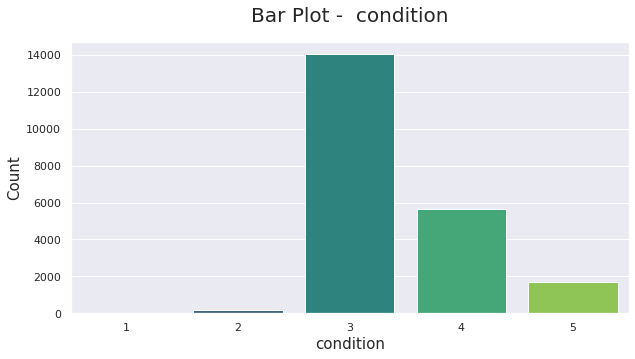

In [20]:
# Condition countplot
CatPlots('condition', house_price)

*Grade*

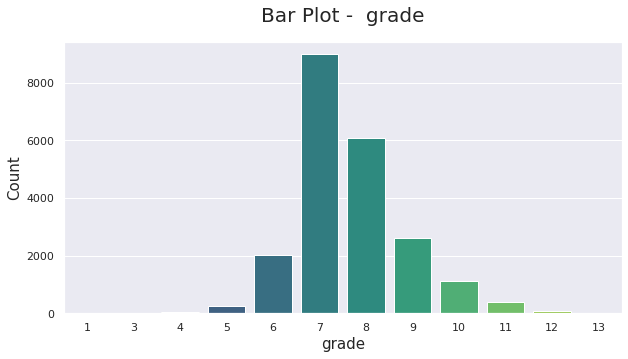

In [21]:
# Grade count plot
CatPlots('grade', house_price)

**Numerical Data Analysis**

*Function definition*

In [22]:
# Function that determines the measures of central tendency.
def MeasureCentral(measure, columns, data):
  for column in columns:
    if measure == 'mean':
      print(f"{column} column mean = {data[column].mean()}")
    elif measure == 'median':
      print(f"{column} column median = {data[column].median()}")
    elif measure == 'mode':
      print(f"{column} column mode = {data[column].mode()}")

In [23]:
# Function used to determine the measures of distribution.
def MeasureDistribution(measure, columns, data):
  for column in columns:
    if measure == 'range':
      print(f"{column} column range = {data[column].max() - data[column].min()}")
    elif measure == 'IQR':
      Q1 = data[column].quantile(0.25)
      Q3 = data[column].quantile(0.75)
      IQR = Q3 - Q1
      print(f"{column} column IQR = {IQR}")
    elif measure == 'var':
      print(f"{column} column variance = {data[column].var()}")
    elif measure == 'std':
      print(f"{column} column std = {data[column].std()}")
    elif measure == 'skew':
      print(f"{column} column skew = {data[column].skew()}")
    elif measure == 'kurt':
      print(f"{column} column kurt = {data[column].kurt()}")


In [24]:
# Distribution and Boxplot plot functions
def NumericalPlots(column, data1, data2):
  fig, ax = plt.subplots(2,2, figsize = (12, 10))
  # Outliers
  # Distribution plot
  sns.distplot(data1[column], hist=True, ax=ax[0,0], color = 'green')
  ax[0,0].set_title('Outliers: Freq dist '+ column, fontsize=10)
  ax[0,0].set_xlabel(column, fontsize=8)
  ax[0,0].set_ylabel('Count', fontsize=8)
  # Box plot
  sns.boxplot(y = data1[column], ax = ax[0,1], color = 'green')
  ax[0,1].set_title(f'Outliers: Box Plot - {column}')
  ax[0,1].set_xlabel(column)

  # No outliers
  # Distribution plot
  sns.distplot(data2[column], hist=True, ax=ax[1,0], color = 'green')
  ax[1,0].set_title('No outliers: Freq dist '+ column, fontsize=10)
  ax[1,0].set_xlabel(column, fontsize=8)
  ax[1,0].set_ylabel('Count', fontsize=8)
  # Box plot
  sns.boxplot(y = data2[column], ax = ax[1,1], color = 'green')
  ax[1,1].set_title(f'No outliers: Box Plot - {column}')
  ax[1,1].set_xlabel(column)
  plt.show()

*Measures of Central Tendency*

In [25]:
# Columns
columns = house_price.columns.tolist()
# Categorical columns
categorical = ['waterfront', 'condition', 'grade']
# Continuous columns
continuous = list(set(columns) - set(categorical))

In [26]:
# Mean
MeasureCentral('mean', continuous, house_price)

sqft_basement column mean = 291.5441040355424
yr_renovated column mean = 84.33015549796372
yr_built column mean = 1970.9999074416883
zipcode column mean = 98077.94261384672
sqft_lot15 column mean = 12770.108339503888
view column mean = 0.23421880784894483
lat column mean = 47.56004967604587
bathrooms column mean = 2.1147375971862274
bedrooms column mean = 3.370927434283599
sqft_living15 column mean = 1986.583163643095
price column mean = 540192.4078119216
sqft_above column mean = 1788.4148463532026
long column mean = -122.21389443724483
floors column mean = 1.494145686782673
sqft_living column mean = 2079.958950388745
sqft_lot column mean = 15109.616299518697


In [27]:
# Median
MeasureCentral('median', continuous, house_price)

sqft_basement column median = 0.0
yr_renovated column median = 0.0
yr_built column median = 1975.0
zipcode column median = 98065.0
sqft_lot15 column median = 7620.0
view column median = 0.0
lat column median = 47.5718
bathrooms column median = 2.25
bedrooms column median = 3.0
sqft_living15 column median = 1840.0
price column median = 450000.0
sqft_above column median = 1560.0
long column median = -122.2305
floors column median = 1.5
sqft_living column median = 1910.0
sqft_lot column median = 7620.0


In [28]:
# Mode
MeasureCentral('mode', continuous, house_price)

sqft_basement column mode = 0    0
dtype: int64
yr_renovated column mode = 0    0
dtype: int64
yr_built column mode = 0    2014
dtype: int64
zipcode column mode = 0    98103
dtype: int64
sqft_lot15 column mode = 0    5000
dtype: int64
view column mode = 0    0
dtype: int64
lat column mode = 0    47.5322
1    47.5491
2    47.6624
3    47.6846
dtype: float64
bathrooms column mode = 0    2.5
dtype: float64
bedrooms column mode = 0    3
dtype: int64
sqft_living15 column mode = 0    1540
dtype: int64
price column mode = 0    350000.0
1    450000.0
dtype: float64
sqft_above column mode = 0    1300
dtype: int64
long column mode = 0   -122.29
dtype: float64
floors column mode = 0    1.0
dtype: float64
sqft_living column mode = 0    1300
dtype: int64
sqft_lot column mode = 0    5000
dtype: int64


*Measures of Distribution*

In [29]:
# Range
MeasureDistribution('range', continuous, house_price)

sqft_basement column range = 4820
yr_renovated column range = 2015
yr_built column range = 115
zipcode column range = 198
sqft_lot15 column range = 870549
view column range = 4
lat column range = 0.621699999999997
bathrooms column range = 8.0
bedrooms column range = 33
sqft_living15 column range = 5811
price column range = 7625000.0
sqft_above column range = 9120
long column range = 1.2040000000000077
floors column range = 2.5
sqft_living column range = 13250
sqft_lot column range = 1650839


Columns such as the price column have wide ranges.

In [30]:
# IQR
MeasureDistribution('IQR', continuous, house_price)

sqft_basement column IQR = 560.0
yr_renovated column IQR = 0.0
yr_built column IQR = 46.0
zipcode column IQR = 85.0
sqft_lot15 column IQR = 4983.25
view column IQR = 0.0
lat column IQR = 0.20712499999999778
bathrooms column IQR = 0.75
bedrooms column IQR = 1.0
sqft_living15 column IQR = 870.0
price column IQR = 323162.5
sqft_above column IQR = 1020.0
long column IQR = 0.20300000000000296
floors column IQR = 1.0
sqft_living column IQR = 1120.75
sqft_lot column IQR = 5650.5


In [31]:
# Variance
MeasureDistribution('var', continuous, house_price)

sqft_basement column variance = 195905.87809357638
yr_renovated column variance = 161215.92227842708
yr_built column variance = 862.6828342581185
zipcode column variance = 2862.986478510289
sqft_lot15 column variance = 745672625.3825761
view column variance = 0.587014329313509
lat column variance = 0.019203867409531023
bathrooms column variance = 0.5932671963797603
bedrooms column variance = 0.8650907860515727
sqft_living15 column variance = 469802.59760976443
price column variance = 134982491312.92407
sqft_above column variance = 685817.7724495424
long column variance = 0.019833134827202073
floors column variance = 0.29150319014114034
sqft_living column variance = 843652.9135275099
sqft_lot column variance = 1716023525.6300366


In [32]:
# Standard Deviation
MeasureDistribution('std', continuous, house_price)

sqft_basement column std = 442.6125598009803
yr_renovated column std = 401.51702613765593
yr_built column std = 29.37146292335672
zipcode column std = 53.50688253402817
sqft_lot15 column std = 27307.006891685807
view column std = 0.7661686037116824
lat column std = 0.13857801921492102
bathrooms column std = 0.7702384023013656
bedrooms column std = 0.9301025674900445
sqft_living15 column std = 685.4214744299776
price column std = 367399.6343396712
sqft_above column std = 828.1411549063013
long column std = 0.14083016305892027
floors column std = 0.5399103538006474
sqft_living column std = 918.5058048414882
sqft_lot column std = 41424.91431047307


In [33]:
# Skewness
MeasureDistribution('skew', continuous, house_price)

sqft_basement column skew = 1.577730731994438
yr_renovated column skew = 4.551733778950017
yr_built column skew = -0.4697823592834102
zipcode column skew = 0.4056844629809451
sqft_lot15 column skew = 9.505817992358532
view column skew = 3.396676532553183
lat column skew = -0.48518259836955446
bathrooms column skew = 0.5111461154271603
bedrooms column skew = 1.9743628437076959
sqft_living15 column skew = 1.1082576840301879
price column skew = 4.021354631513139
sqft_above column skew = 1.4467403506883187
long column skew = 0.8852768444876
floors column skew = 0.616339735126005
sqft_living column skew = 1.4714674846314069
sqft_lot column skew = 13.058690623882546


Some columns have a positve skew, only two have a slightly negative skew. The rest of the columns have a close-to-normal distribution.

In [34]:
# Kurtosis
MeasureDistribution('kurt', continuous, house_price)

sqft_basement column kurt = 2.714432815066743
yr_renovated column kurt = 18.72154593111135
yr_built column kurt = -0.6571807366498081
zipcode column kurt = -0.8535698817907043
sqft_lot15 column kurt = 150.732711029956
view column kurt = 10.900687076848012
lat column kurt = -0.6767834455237307
bathrooms column kurt = 1.2792645615484326
bedrooms column kurt = 49.06562128233084
sqft_living15 column kurt = 1.5969742424841624
price column kurt = 34.51538421151693
sqft_above column kurt = 3.4019276693258385
long column kurt = 1.049927493411873
floors column kurt = -0.4848736638828255
sqft_living column kurt = 5.242209340747705
sqft_lot column kurt = 285.01867792617475


Theres a mixture of Platykurtic, Leptokurtic and Mesokurtic column distributions.

**Distribution and Box Plots**

*Price*

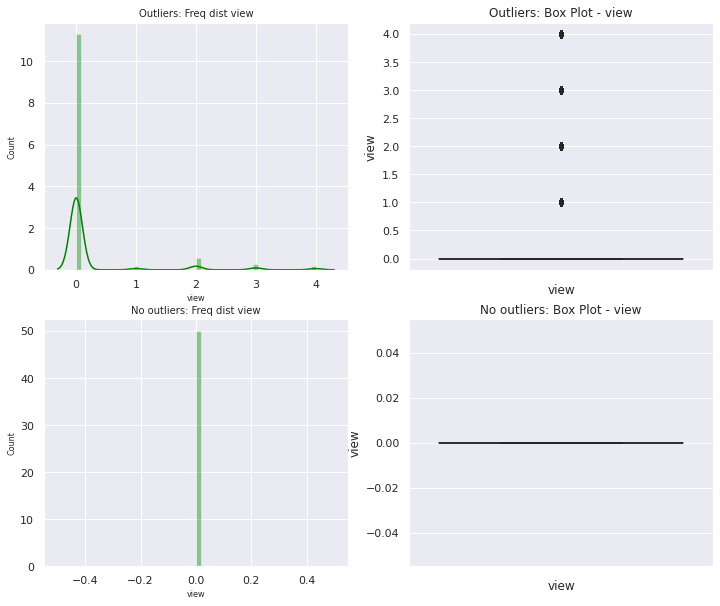

In [35]:
# Price column
NumericalPlots(continuous[5], house_price, house_price_no)

* Some outliers have been retained.
* After the outliers were removed, the distribution 

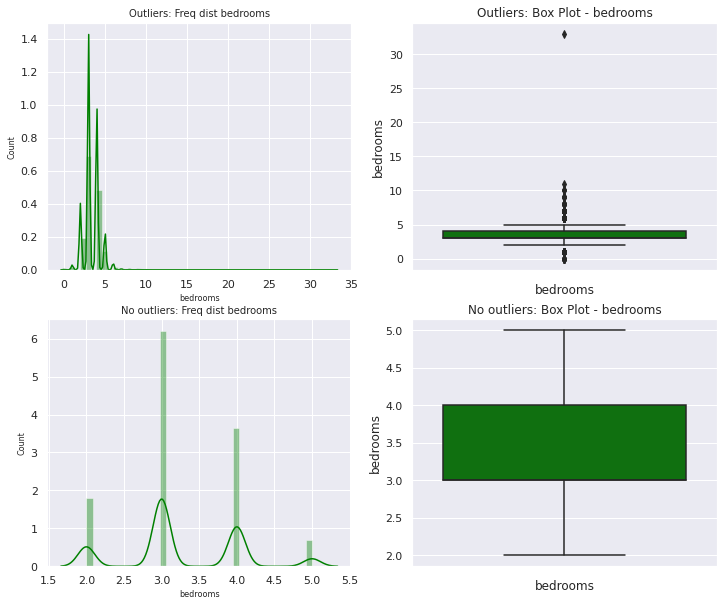

In [36]:
# Number of bedrooms column
NumericalPlots('bedrooms', house_price, house_price_no)

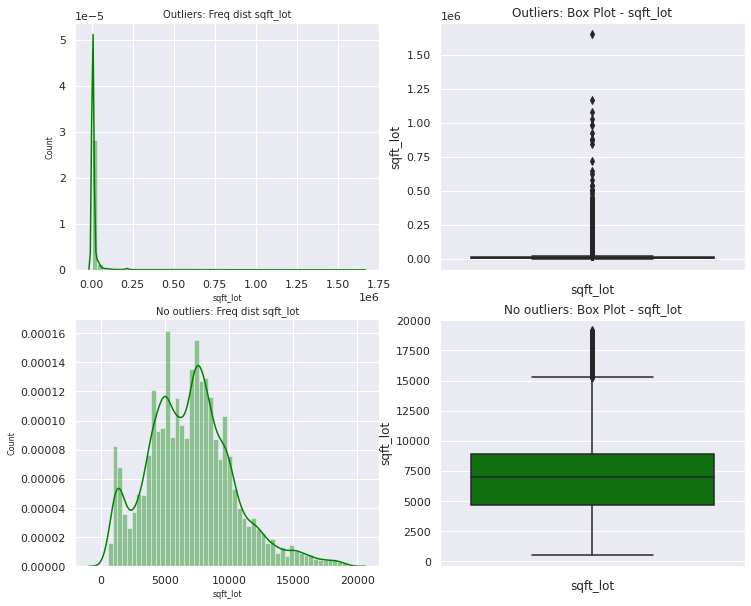

In [37]:
# Number of bathrooms column
NumericalPlots('sqft_lot', house_price, house_price_no)

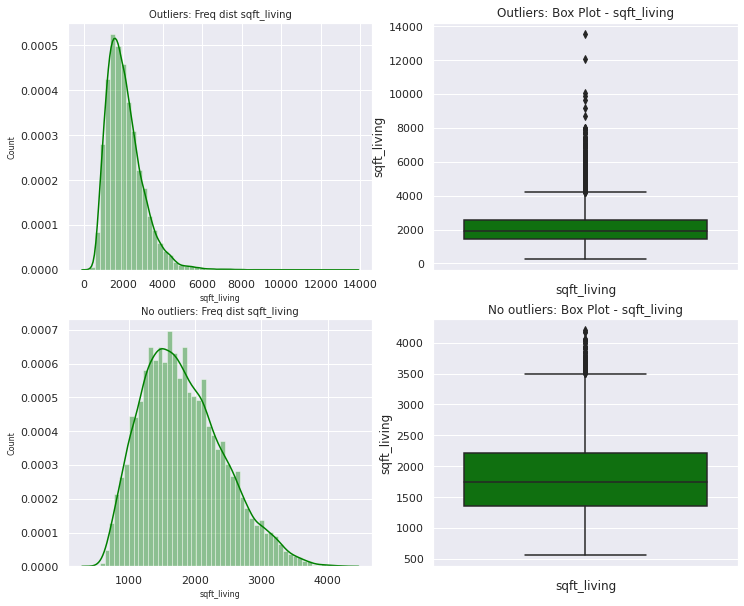

In [38]:
# Square feet area of living area column
NumericalPlots(continuous[-2], house_price, house_price_no)

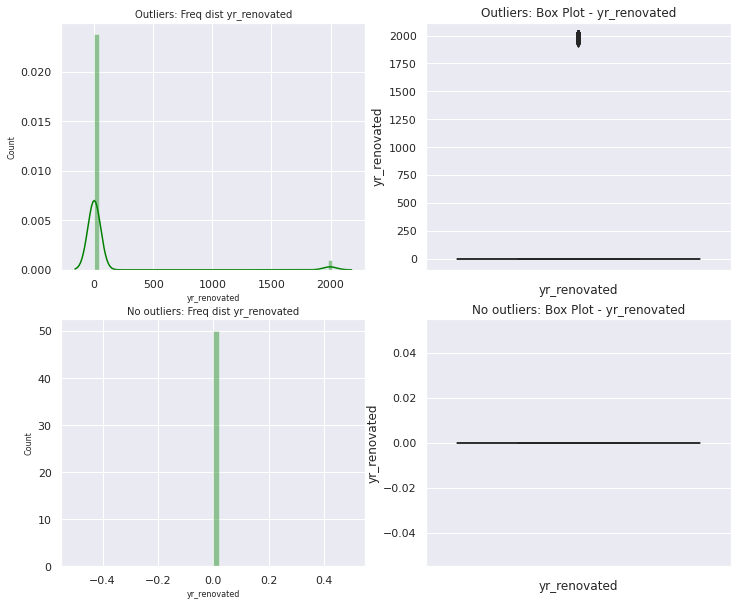

In [39]:
# Square feet area of living area column
NumericalPlots(continuous[1], house_price, house_price_no)

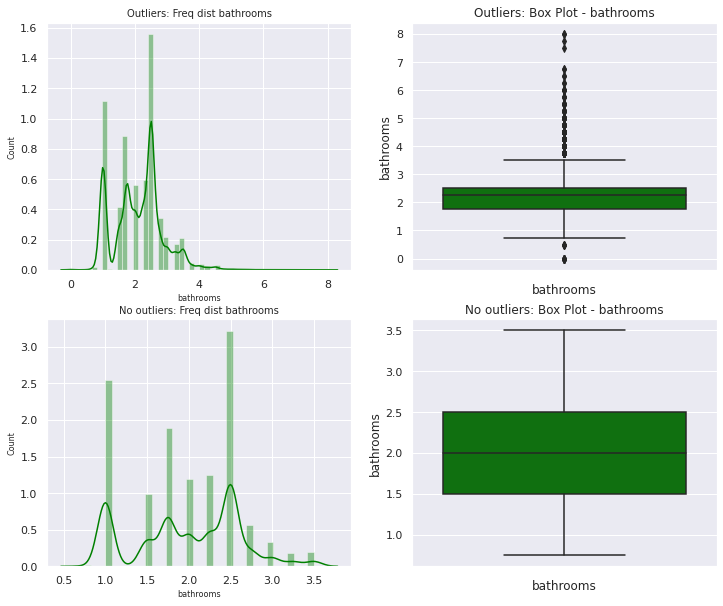

In [40]:
# Square feet area of parking Layout floors column
NumericalPlots(continuous[7], house_price, house_price_no)

In [41]:
continuous

['sqft_basement',
 'yr_renovated',
 'yr_built',
 'zipcode',
 'sqft_lot15',
 'view',
 'lat',
 'bathrooms',
 'bedrooms',
 'sqft_living15',
 'price',
 'sqft_above',
 'long',
 'floors',
 'sqft_living',
 'sqft_lot']

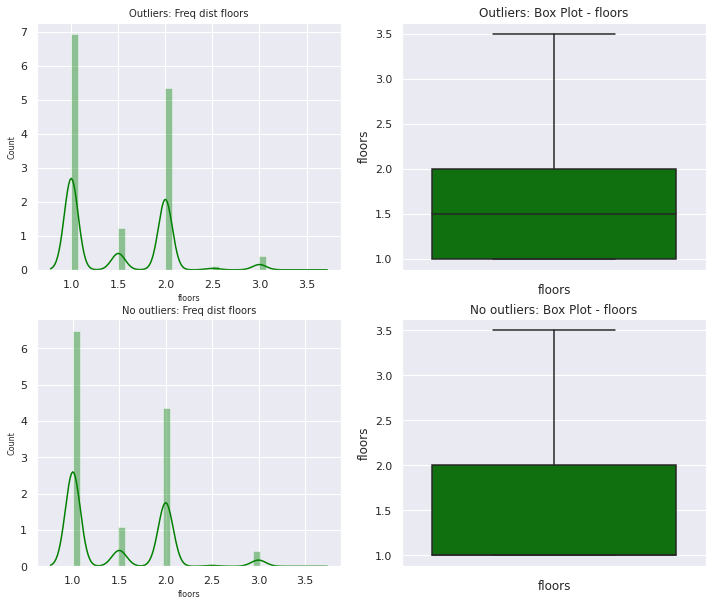

In [42]:
# Number of Floors column
NumericalPlots('floors', house_price, house_price_no)

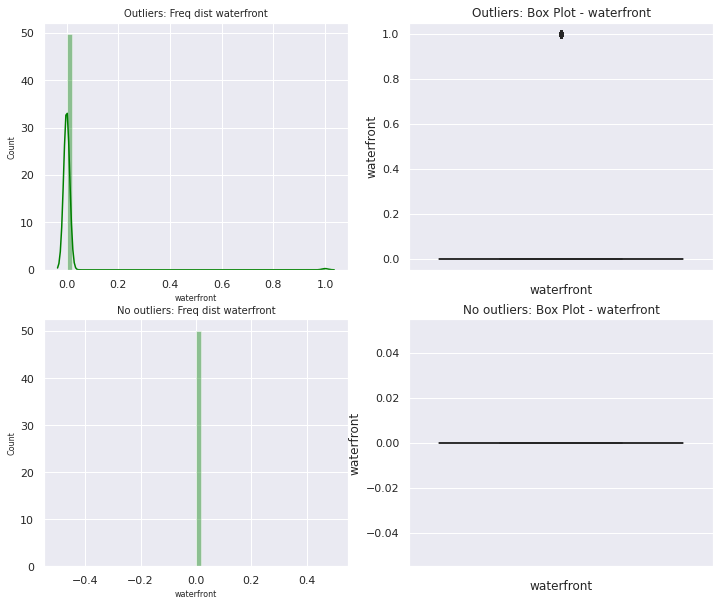

In [43]:
# Whether waterfront is there or not column
NumericalPlots(columns[6], house_price, house_price_no)

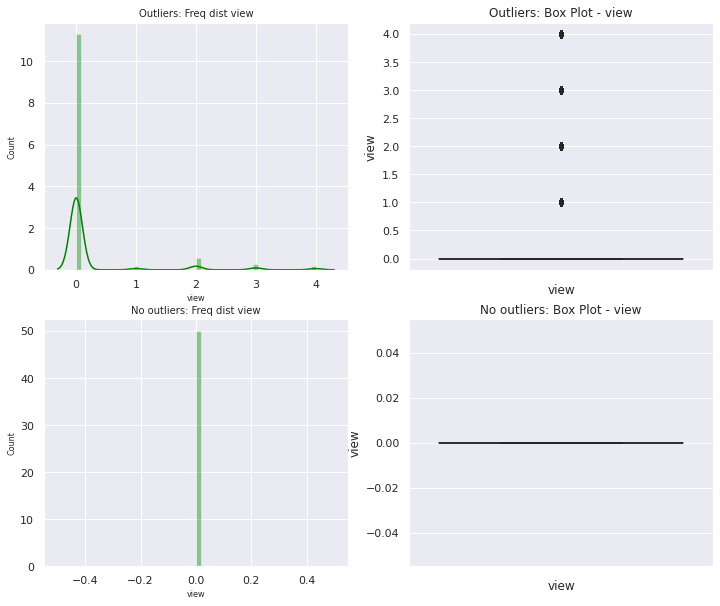

In [44]:
# Number of Views column
NumericalPlots(columns[7], house_price, house_price_no)

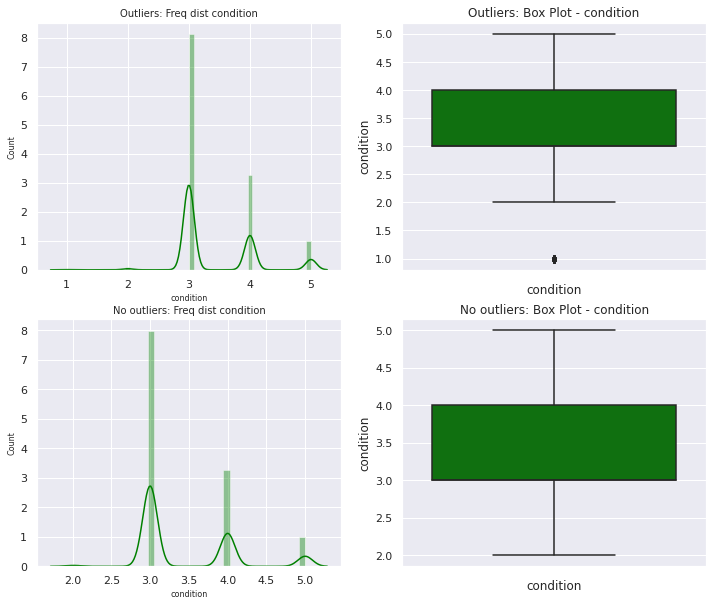

In [45]:
# Condition column
NumericalPlots(columns[8], house_price, house_price_no)

Id 

price  - Price of the house

bedrooms - Number of Bedrooms

bathrooms - Number of Bathrooms

sqft_living - Square feet area of living area

sqft_lot  - Square feet area of parking Layout

floors - Number of Floors

waterfront - Whether waterfront is there or not

view - Number of Views

grade - Grades

sqft_above

sqft_basement - Square feet area off basement

yr_built - Year the house is built

yr_renovated - Year the house is renovated

zipcode - zipcode os the house

lat : Latitude of the house

lon : Longitude of the house

sqft_living15

sqft_lot15

In [46]:
house_price.condition.unique()

array([3, 5, 4, 1, 2])

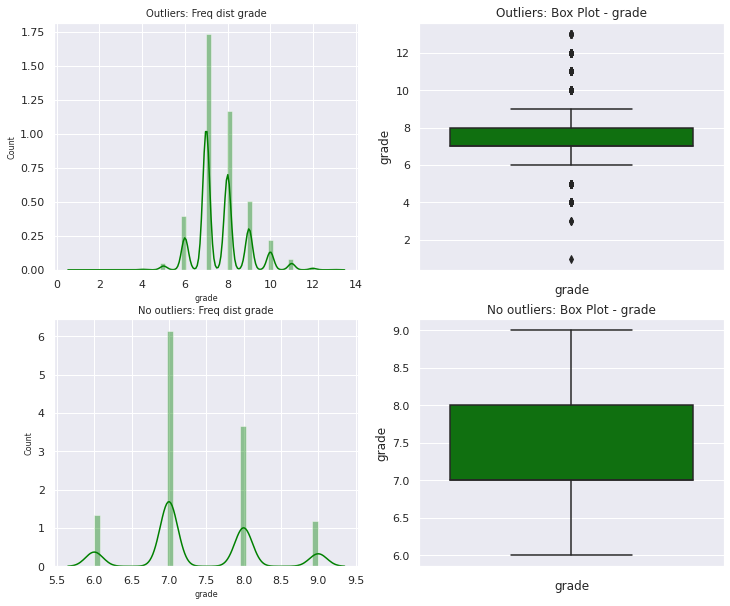

In [47]:
# Price column
NumericalPlots(columns[9], house_price, house_price_no)

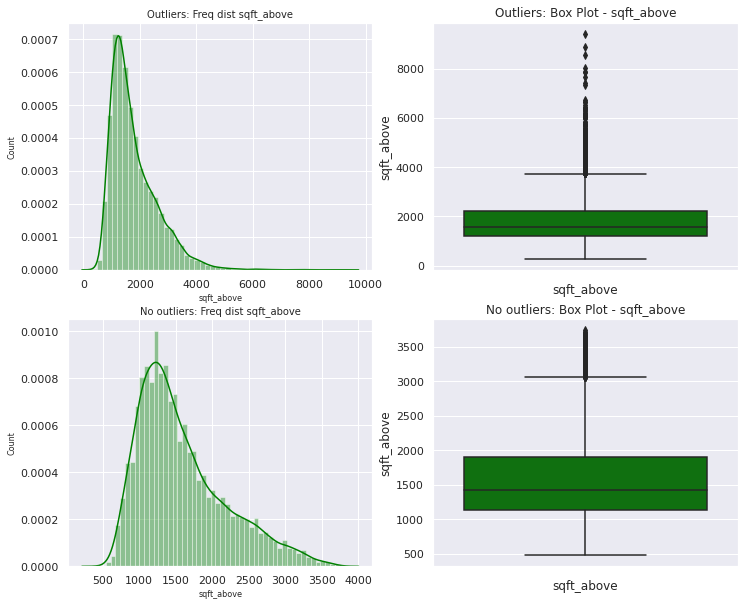

In [48]:
# Price column
NumericalPlots(columns[10], house_price, house_price_no)

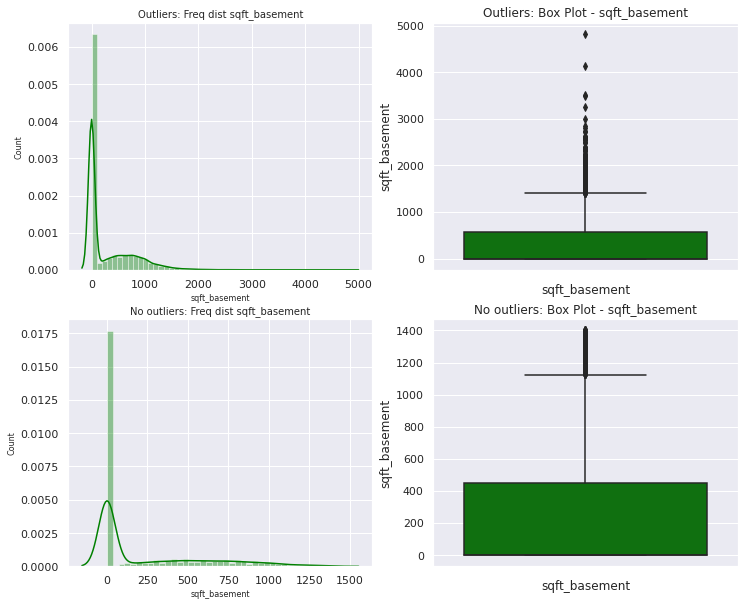

In [49]:
# Price column
NumericalPlots(columns[11], house_price, house_price_no)

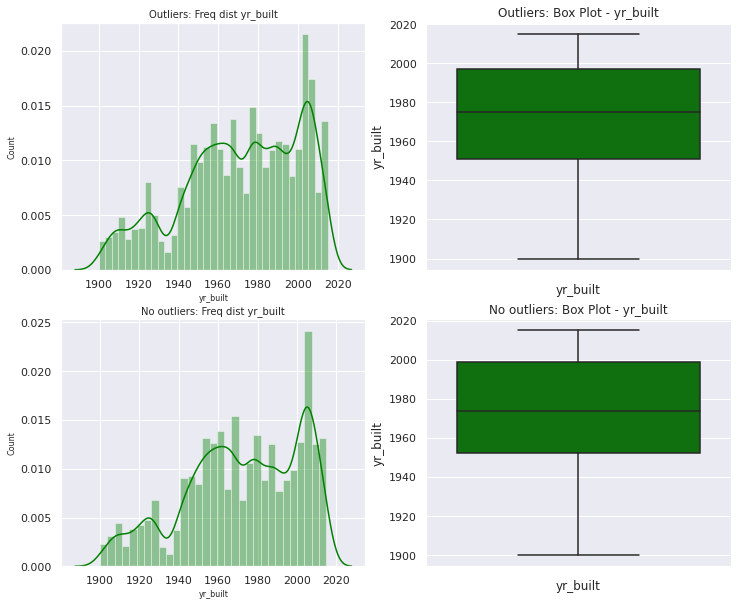

In [50]:
# Price column
NumericalPlots(columns[12], house_price, house_price_no)

### b) Bivariate Analysis

*Function Definition*

In [51]:
# Pearson Correlation
def Corr(x,y,data):
  corr = data[[x,y]].corr()
  print(f'Correlation Matrix : \n{corr}')

In [52]:
# Numerical-numerical plots
def LineScatterPlots(x, y, data1, data2):
  fig, ax = plt.subplots(1, 2, figsize = (15, 5))
  # sns.scatterplot(data[x], data[y], ax = ax[0], color = 'green')
  # ax[0].set_title(f'Scatter Plot: {x} - {y}', y = 1.05)
  sns.lineplot(data1[x], data1[y], color = 'green', marker='o', ci=None, ax = ax[0])
  ax[0].set_title(f'Line Plot: {x} - {y} (With outliers)', y = 1.05)
  sns.lineplot(data2[x], data2[y], color = 'green', marker='o', ci=None, ax = ax[1])
  ax[1].set_title(f'Line Plot: {x} - {y} (Without outliers)', y = 1.05)
  plt.show()
  print('\nCorrelation - with outliers\n')
  Corr(x, y, data1)
  print('\nCorrelation - without outliers\n') 
  Corr(x, y, data2) 

In [53]:
# Pairplot Function
def PairPlot(data):
  cols = data.columns.values
  plot = sns.pairplot(data)
  plot.fig.set_size_inches(10,5)
  plot.fig.suptitle(f'Pairplot: {cols[0]} - {cols[1]}', y = 1.05)
  # plt.title()
  plt.show()
  print('\nCorrelation\n')
  Corr(cols[0], cols[1], data)

*Price Vs Number of Bedrooms*

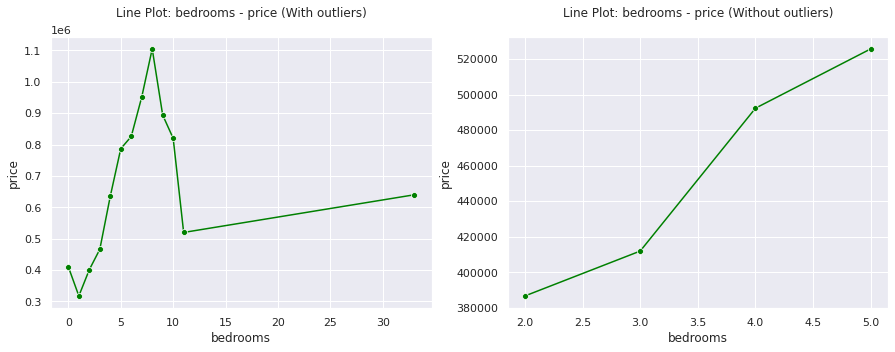


Correlation - with outliers

Correlation Matrix : 
          bedrooms     price
bedrooms  1.000000  0.308314
price     0.308314  1.000000

Correlation - without outliers

Correlation Matrix : 
          bedrooms     price
bedrooms  1.000000  0.239194
price     0.239194  1.000000


In [54]:
# Price Vs Number of Bedrooms
LineScatterPlots(columns[1], columns[0], house_price, house_price_no)

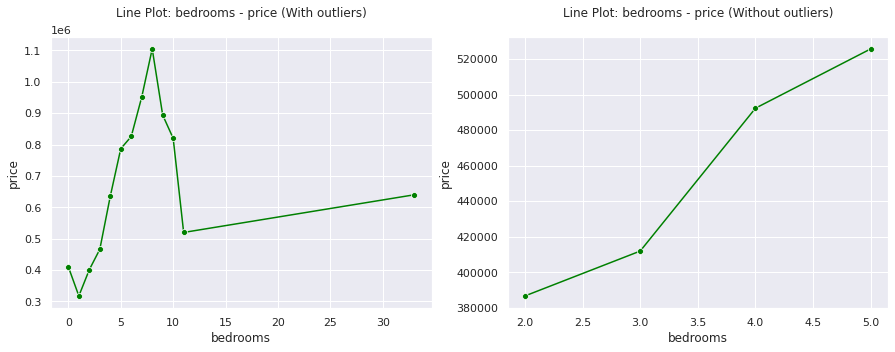


Correlation - with outliers

Correlation Matrix : 
          bedrooms     price
bedrooms  1.000000  0.308314
price     0.308314  1.000000

Correlation - without outliers

Correlation Matrix : 
          bedrooms     price
bedrooms  1.000000  0.239194
price     0.239194  1.000000


In [55]:
# Price Vs Number of Bedrooms
LineScatterPlots(columns[1], columns[0], house_price, house_price_no)

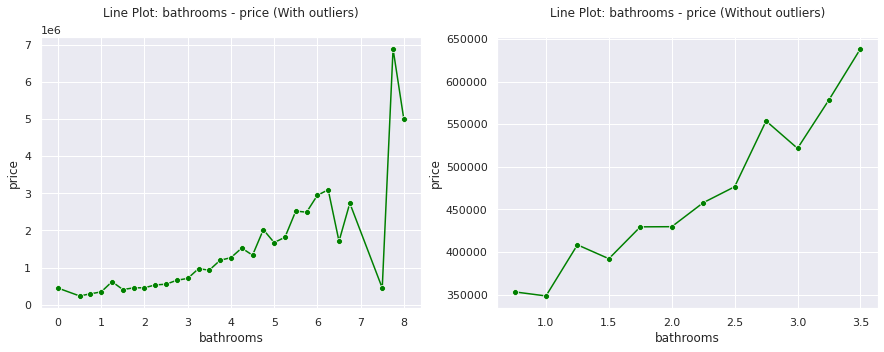


Correlation - with outliers

Correlation Matrix : 
           bathrooms     price
bathrooms   1.000000  0.525143
price       0.525143  1.000000

Correlation - without outliers

Correlation Matrix : 
           bathrooms     price
bathrooms   1.000000  0.340716
price       0.340716  1.000000


In [56]:
# Price Vs Number of Bathrooms
LineScatterPlots(columns[2], columns[0], house_price, house_price_no)

*Price Vs Number of Bathrooms*

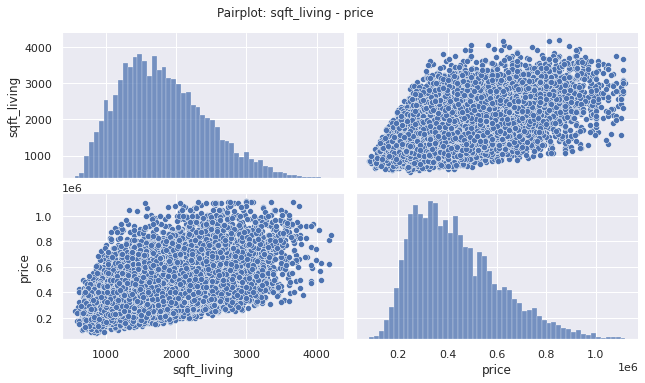


Correlation

Correlation Matrix : 
             sqft_living     price
sqft_living     1.000000  0.514431
price           0.514431  1.000000


In [57]:
# Pairplot
PairPlot(house_price_no[[columns[3], columns[0]]])

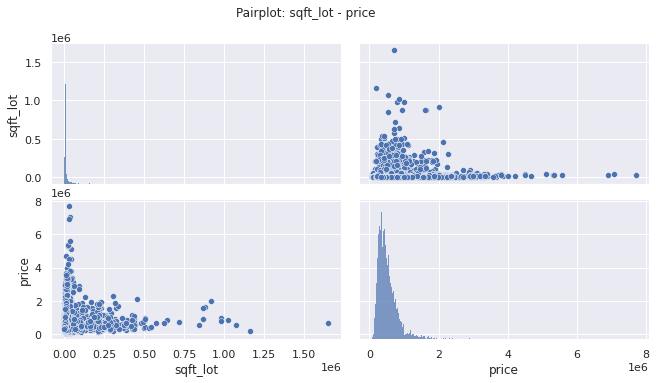


Correlation

Correlation Matrix : 
          sqft_lot     price
sqft_lot  1.000000  0.089647
price     0.089647  1.000000


In [58]:
PairPlot(house_price[[columns[4], columns[0]]])

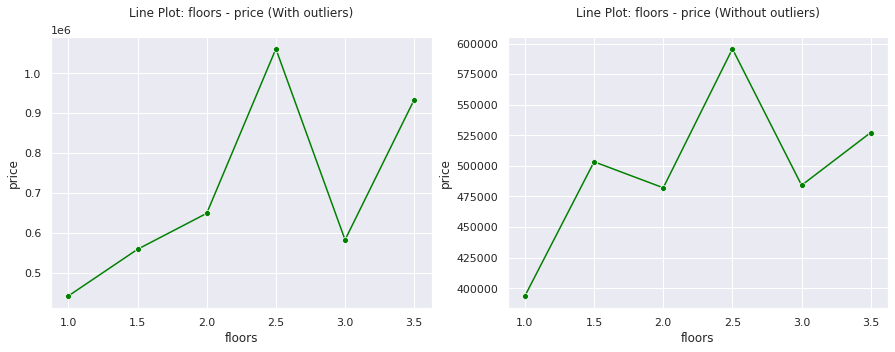


Correlation - with outliers

Correlation Matrix : 
          floors     price
floors  1.000000  0.256885
price   0.256885  1.000000

Correlation - without outliers

Correlation Matrix : 
          floors     price
floors  1.000000  0.227412
price   0.227412  1.000000


In [59]:
# Price Vs Number of Bedrooms
LineScatterPlots(columns[5], columns[0], house_price, house_price_no)

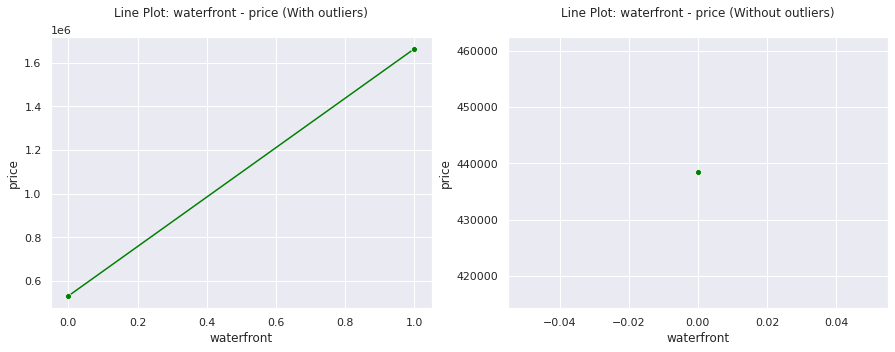


Correlation - with outliers

Correlation Matrix : 
            waterfront     price
waterfront    1.000000  0.266332
price         0.266332  1.000000

Correlation - without outliers

Correlation Matrix : 
            waterfront  price
waterfront         NaN    NaN
price              NaN    1.0


In [60]:
# Price Vs Number of Bedrooms
LineScatterPlots(columns[6], columns[0], house_price, house_price_no)

In [61]:
house_price.waterfront.unique()

array([0, 1])

Id 

price  - Price of the house

bedrooms - Number of Bedrooms

bathrooms - Number of Bathrooms

sqft_living - Square feet area of living area

sqft_lot  - Square feet area of parking Layout

floors - Number of Floors

waterfront - Whether waterfront is there or not

view - Number of Views

grade - Grades

sqft_above

sqft_basement - Square feet area off basement

yr_built - Year the house is built

yr_renovated - Year the house is renovated

zipcode - zipcode os the house

lat : Latitude of the house

lon : Longitude of the house

sqft_living15

sqft_lot15

In [62]:
columns

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

## 6. Modelling

**Train-test-split**

In [64]:
# Features and labels

# Dataset with outliers
Xo = house_price.drop('price', 1).values
yo = house_price.values.reshape(-1, 1)

# Dataset without outliers
Xno = house_price_no.drop('price', 1).values
yno = house_price_no.price.values.reshape(-1, 1)

In [66]:
# Columns
columns

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

### a) Multiple Linear Regression

### b) Quantile Regression

### c) Ridge Regression

### d) Lasso Regression

### e) Elastic Net Regression